<a href="https://colab.research.google.com/github/aleksejalex/expert-octo-eureka/blob/main/RADcv_Assignment_1_Gaj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RADcv - 1. zápočtová úloha
Aleksej Gaj
(vypracováno v Pythonu)

Zadání:

## Popis úlohy

V tomto úkolu je cílem provést předzpracování datového souboru, jeho vizualizaci a jednoduchou lineární regresní úlohu, kde se budeme zajímat o ceny nemovitostí. Za tímto účelem využijeme datový set *saratosa_hoouses* z knihovny *moderndive* obsahující výběr 1057 domů.

## načtení knihoven, definice flastních fcí

In [1]:
# updating packages ... NOT NECESSARY
!pip install numpy --upgrade
!pip install scipy --upgrade
!pip install pandas --upgrade
!pip install seaborn --upgrade
!pip install csv --upgrade
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement csv (from versions: none)
ERROR: No matching distribution found for csv
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# importy balicku
import inspect
import numpy as np
import pandas as pd
import seaborn as sbn
import csv
import matplotlib as mpt
from matplotlib import pyplot as plt


def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]


examplevarr = 4
print(examplevarr)
print(retrieve_name(examplevarr))

4
['examplevarr']


<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

## nahrání datasetu
dataset snažen z https://r-data.pmagunia.com/dataset/r-dataset-package-mosaicdata-saratogahouses

Načten do notebooku pomocí kopie na GitHubu

In [3]:
# import datasetu (pomoci Pandas)
# (puvodne dataset byl stazen z >>  https://r-data.pmagunia.com/dataset/r-dataset-package-mosaicdata-saratogahouses  )
url = "https://raw.githubusercontent.com/aleksejalex/expert-octo-eureka/main/dataset_saratoga_houses_from_R.csv"
data = pd.read_csv(url)

data
#data.info

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,289000,0.38,32,24200,2310,61,5,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1724,285000,0.94,37,36200,2564,61,4,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1725,194900,0.39,9,20400,1099,51,2,0,1.0,3,hot air,gas,public/commercial,No,No,No
1726,125000,0.24,48,16800,1225,51,3,1,1.0,7,hot air,gas,public/commercial,No,No,No


## popis dat:

A data frame with 1728 observations on the following 16 variables.

* `price` price (1000s of US dollars)

* `lotSize` size of lot (square feet)

* `age` age of house (years)

* `landValue` value of land (1000s of US dollars)

* `livingArea` living are (square feet)

* `pctCollege` percent of neighborhood that graduated college

* `bedrooms` number of bedrooms

* `firplaces` number of fireplaces

* `bathrooms` number of bathrooms (half bathrooms have no shower or tub)

* `rooms` number of rooms

* `heating` type of heating system

* `fuel` fuel used for heating

* `sewer` type of sewer system

* `waterfront` whether property includes waterfront

* `newConstruction` whether the property is a new construction

* `centralAir` whether the house has central air

Převzato z >>>   https://r-data.pmagunia.com/dataset/r-dataset-package-mosaicdata-saratogahouses

## Otázka 01

Zjistěte, zdali data neobsahují chybějící hodnoty *NA*. Pokud ano, tak rozhodněte zdali můžete příslušná pozorování z dat odstranit a proč. Které proměnné jsou kvantitativní a které kvalitativní? Jeli možno některé zařadit do obou skupin, pro kterou byste se rozhodli? Které proměnné je možné pužít jako faktorové ordinální a jaké jako faktorové nominální a proč? Spočtěte základní statistiky pro jednotlivé proměnné.

In [4]:
nan_in_data = data.isnull().sum().sum()

print('Number of NaN values in dataframe: ' + str(nan_in_data))


Number of NaN values in dataframe: 0


In [5]:
# totez lze videt z 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1728 non-null   int64  
 1   lotSize          1728 non-null   float64
 2   age              1728 non-null   int64  
 3   landValue        1728 non-null   int64  
 4   livingArea       1728 non-null   int64  
 5   pctCollege       1728 non-null   int64  
 6   bedrooms         1728 non-null   int64  
 7   fireplaces       1728 non-null   int64  
 8   bathrooms        1728 non-null   float64
 9   rooms            1728 non-null   int64  
 10  heating          1728 non-null   object 
 11  fuel             1728 non-null   object 
 12  sewer            1728 non-null   object 
 13  waterfront       1728 non-null   object 
 14  newConstruction  1728 non-null   object 
 15  centralAir       1728 non-null   object 
dtypes: float64(2), int64(8), object(6)
memory usage: 216.1+ KB
N


Kvalitativní proměnné: \\
`heating` \\
`fuel` \\
`sewer` \\
`waterfront` \\
`newConstruction` \\
`centralAir` \\

Kvantitativní proměnné: \\
`price` \\
`lotSize` \\
`age` \\
`landValue` \\
`livingArea` \\
`pctCollege` \\

"Obojetné" proměnné: \\
`bedrooms` \\
`fireplaces` \\
`bathrooms` \\
`rooms` \\








### Základní statistiky

In [6]:
print(data.describe())

               price      lotSize          age      landValue   livingArea  \
count    1728.000000  1728.000000  1728.000000    1728.000000  1728.000000   
mean   211966.705440     0.500214    27.916088   34557.187500  1754.975694   
std     98441.391015     0.698680    29.209988   35021.168056   619.935553   
min      5000.000000     0.000000     0.000000     200.000000   616.000000   
25%    145000.000000     0.170000    13.000000   15100.000000  1300.000000   
50%    189900.000000     0.370000    19.000000   25000.000000  1634.500000   
75%    259000.000000     0.540000    34.000000   40200.000000  2137.750000   
max    775000.000000    12.200000   225.000000  412600.000000  5228.000000   

        pctCollege     bedrooms   fireplaces    bathrooms        rooms  
count  1728.000000  1728.000000  1728.000000  1728.000000  1728.000000  
mean     55.567708     3.154514     0.601852     1.900174     7.041667  
std      10.333581     0.817351     0.556102     0.658352     2.316453  
min  

## Otázka 02

Chceme koupit nemovitost v zahraničí a průzkumem trhu jsme obdřeli předchozí data set *saratoga_houses*. Jelikož ale máme přesnější požadavky a nerozumíme imperiálním jednotkám, potřebujeme data upravit:

* Převeďte cenu nemovitostí z dolarů na koruny v tisících a plochu pozemku a obytnou plochu z akrů a čtverečích stop na $m^2$. (chceck describtion by *? saratoga_houses*) 
* Vyberte jen nemovitosti starší 10 let a mladší 50 let, jejichž cena je menší než 7500000 Kč, a plocha pozemku je mezi 500 a 5000 $m^2$.
* Počet koupelen a počet pokojů převeďte na faktorové proměnné o 3 úrovních.

**Dále pracujte jen s takto omezeným datasetem a s proměnnýma *cena*, *plocha_obytna*, *plocha_pozemku* *pocet_pokoju*,*stari_domu*, *pocet_koupelen*, *krb*.**

In [7]:
data_cz = pd.DataFrame()
data_cz['cena'] = data.price * 24.96     # kurz k 20221019, ceny byly v tisicich uz v USD
data_cz['plocha_pozemku'] = data.lotSize * 0.09290304  # square ft to m2
data_cz['plocha_obytna'] = data.livingArea * 0.09290304  # square ft to m2
data_cz['pocet_pokoju'] = data.bedrooms
data_cz['stari_domu'] = data.age
data_cz['pocet_koupelen'] = data.bathrooms
data_cz['krb'] = data.fireplaces

print(data_cz)



           cena  plocha_pozemku  plocha_obytna  pocet_pokoju  stari_domu  \
0     3307200.0        0.008361      84.170154             2          42   
1     4520630.4        0.085471     181.439637             3           0   
2     2720640.0        0.017652     180.603510             4         133   
3     3868800.0        0.038090     180.603510             3          13   
4     2148057.6        0.010219      78.038554             2           0   
...         ...             ...            ...           ...         ...   
1723  7213440.0        0.035303     214.606022             5          32   
1724  7113600.0        0.087329     238.203395             4          37   
1725  4864704.0        0.036232     102.100441             2           9   
1726  3120000.0        0.022297     113.806224             3          48   
1727  2778048.0        0.054813     181.997055             3          86   

      pocet_koupelen  krb  
0                1.0    1  
1                2.5    0  
2  

## Otázka 03 

* Porovnejte průměry cen nemovitostí s krbem a bez krbu a otestujte, zdali na hladině významnosti $\alpha = 0.01$ je průměrná cena nemovitostí s krbem větší než průměrná cena nemovitostí bez krbu.

# Vizualizace dat

## Otázka 04 

* Vykreslete scatterploty pro všechny numerické proměnné, kde bude barevně rozlišeno, zdali se jedná o nemovitost s krbem, nebo bez krbu.
*  Pro proměnné *pocet_pokoju* a *pocet_pater* a *sklep* vykreslete krabicové diagramy (nebo violin ploty), kde odezvou bude *cena*.
* Pro proměnnou *cena* vykreslete histogram spolu s jádrovým odhadem hustoty.


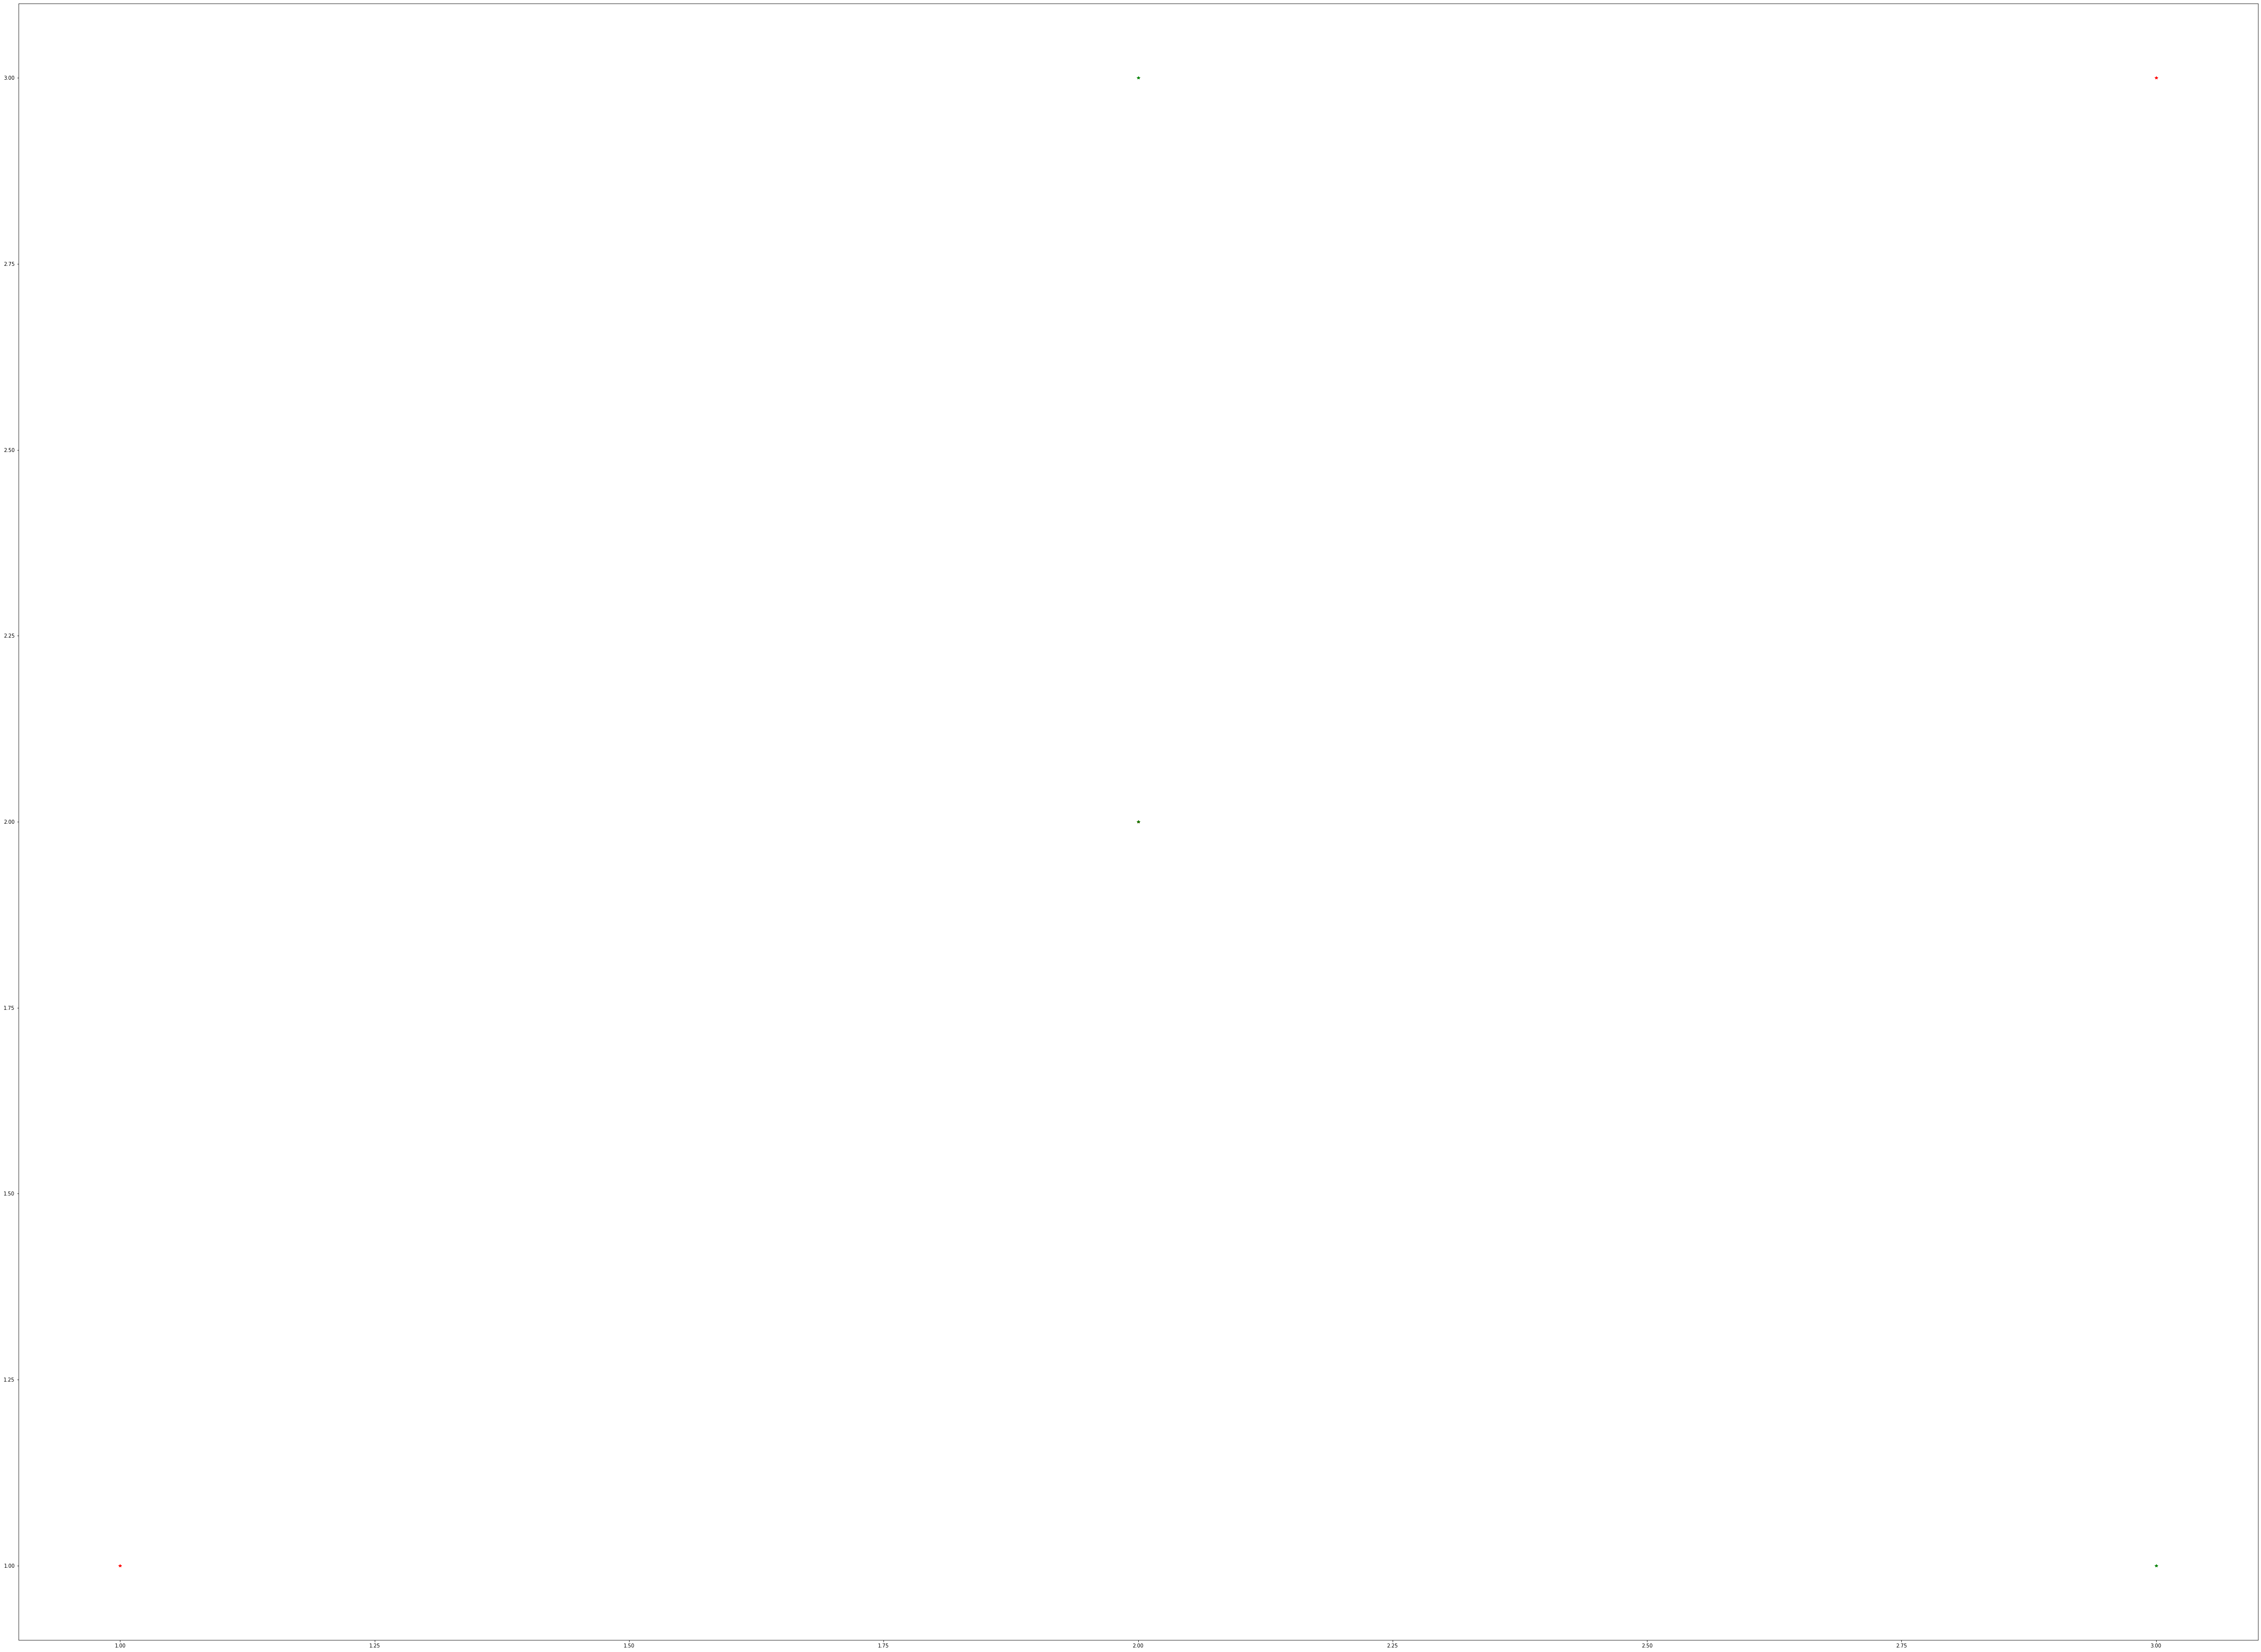

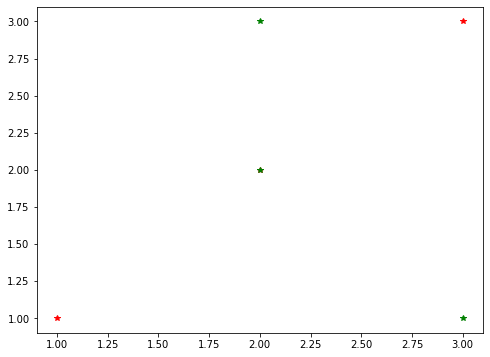

In [8]:
# tj. pro kazdou numerickou promennou jeden scatterplot se dvemi ploty: zelene bez krbu, cervene s krbem

plt.figure(figsize=(80,60))
plt.plot(np.array([1,2,3]), np.array([1,2,3]),'r*')
plt.plot(np.array([2,2,3]), np.array([3,2,1]),'g*')
plt.show()

plt.figure(figsize=(8,6))
plt.plot(np.array([1,2,3]), np.array([1,2,3]),'r*')
plt.plot(np.array([2,2,3]), np.array([3,2,1]),'g*')
plt.show()


## Otázka 05

Pro kombinace faktorizovaných proměnných *pocet_pokoju*, *pocet_koupelen*  vykreslete cenu nemovitosti, aby bylo na obrázku vidět, jestli se v průměru liší ceny nemovitostí majících více pokojů, nebo více koupelen a zdali jsou zastoupeny všechny kombiance všech úrovních pro dvě zmíněné faktorové proměnné.

## Otázka 06

Pro nemovitosti s dvěma ložnicema vykreslete závislost ceny na obytné ploše nemovitosti, kde jednotlivé události označíte barvou podle toho zdali mají krb a velikost bodů v grafu bude odpovídat počtu koupelen (pro tuto úlohu je lepší vzít počet koupelen jako numerickou proměnnou).

**Dále pracujte jen s nemovitostmi se dvěma ložnicemi.**

# Jednoduchý lineární model

## Otázka 07

Sestavte jednoduchý regresní model (s i bez interceptu), kde vysvětlovaná proměnná
bude cena nemovitosti a vysvětlující obytná plocha.   Spočtěte pro oba modely $R^2$ a $F$ statistiky, co nám o modelech říkají. Vyberte jeden z nich a zdůvodněte proč ho preferujete.

Na základě zvoleného modelu odpovězte, zdali cena nemovitosti závisí na obytné ploše  a pokud ano, o kolik se změní očekávaná cena pro nemovitost s obytnou plochou zvětšenou o $20 m^2$? 

## Otázka 08
Sestavte jednoduchý linární model jako v předchozí otázce pro nemovitosti s krbem a bez krbu. Jaký model vykazuje silnější linearní vztah mezi cenou a obytnou plochou? O kolik cena s rostoucí obytnou plochou pro nemovitosti s krbem roste rychleji než pro nemovitosti bez krbu?

Spočtěte 95% konfidenční intervaly pro regresní koeficienty popisující sklon regresní přímky v obou modelech a zjistěte, zdali se protínají. Co z toho můžeme vyvozovat?

Na základě těchto modelů zjistěte o kolik procent bude mít průměrná nemovitost s krbem a obytnou plochou $160m^2$ vyšší očekávanou cenu než průměrná nemovitost o stejné obytné ploše, ale bez krbu.

## Otázka 09

Vykreslete scatterplot obytné plochy a ceny nemovitostí. Do tohoto grafu vykreslete regresní přímky vybraných modelů pro nemovitosti s krbem a bez něho, jednoltivé body i regresní přímky označte barvou podle toho k jaké skupině přísluší.

Sestrojte 90% konfidenční intervaly okolo očekávaných cen pro jednoltivé skupiny a na jejich základě rozhodněte, zdali a jak se očekávané ceny budou lišit pro nemovitosti s obytnou plochou menší než $120m^2$. Je to porovnávání správné? Zdůvoněte.

## Otázka 10

Vykreslete histogramy pro rezidua modelů z předchozí otázky. Proložte je hustotou normálního rozdělení s nulovou střední hodnotou a rozptylem odpovídajícím $\hat{\sigma}^2$ z jednotlivých modelů.

Co výsledný graf říka o n našich modelech a je toto ověření dostatečné pro validaci model?

Navrněte další úpravy modelu za cílem co nejlépe predikvoat cenu nemovitosti.

In [1]:
pltbox = data.boxplot()
pltbox.show()

NameError: ignored

In [ ]:
#@title
